# Lecture 3

 - [X] Word frequencies continued
 - [X] The Inaugural Address Corpus (and the nltk.corpus API) 
 - [X] Parts of speech
 - [X] The Brown Corpus (and its parts of speech) 

In [9]:
import nltk
import pandas as pd

In [54]:
from nltk.corpus import inaugural
from nltk.corpus import brown 

In [4]:
type(inaugural)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

- inaugural.words() # Gets all the words
- inaugural.fileids() # Gets a list of all the files
- inaugural.raw() # Gets the raw text 

In [5]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

<AxesSubplot:>

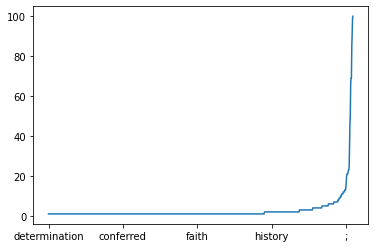

In [17]:
pd.Series(nltk.FreqDist(inaugural.words('2013-Obama.txt'))).sort_values().plot() #.sort_values(ascending=False)

In [21]:
# List comprehension: shorthand way
allWords1 = [inaugural.words(fid) for fid in inaugural.fileids()]

# Longhand way
allWords2 = []
for fileid in inaugural.fileids():
    words = inaugural.words(fileid)
    allWords2.append(words)

In [22]:
allWords1 == allWords2

True

In [43]:
def getLowercasedWords(fileid):
    """
    Just gets lowercased words instead of the words themselves.
    """
    words = inaugural.words(fileid)
    words = [word.lower() for word in words] # Lowercases all words
    return words

In [45]:
allWords = {fid: nltk.FreqDist(getLowercasedWords(fid)) for fid in inaugural.fileids()}

In [46]:
presidentsFreqs = pd.DataFrame(allWords)

In [47]:
presidentsFreqs = presidentsFreqs.fillna(0.0)

In [49]:
presidentsFreqs

,1789-Washington.txt,1793-Washington.txt,1797-Adams.txt,1801-Jefferson.txt,1805-Jefferson.txt,1809-Madison.txt,1813-Madison.txt,1817-Monroe.txt,1821-Monroe.txt,1825-Adams.txt,...,1981-Reagan.txt,1985-Reagan.txt,1989-Bush.txt,1993-Clinton.txt,1997-Clinton.txt,2001-Bush.txt,2005-Bush.txt,2009-Obama.txt,2013-Obama.txt,2017-Trump.txt
fellow,3.0,1.0,3.0,7.0,8.0,1.0,1.0,6.0,10.0,3.0,...,3.0,3.0,2.0,5.0,7.0,1.0,3.0,1.0,3.0,1.0
-,1.0,0.0,3.0,4.0,0.0,2.0,1.0,8.0,6.0,1.0,...,5.0,7.0,2.0,2.0,1.0,1.0,2.0,9.0,9.0,1.0
citizens,5.0,1.0,5.0,7.0,10.0,1.0,4.0,9.0,15.0,2.0,...,3.0,6.0,2.0,2.0,7.0,9.0,6.0,1.0,6.0,4.0
of,71.0,11.0,140.0,104.0,101.0,69.0,65.0,164.0,197.0,245.0,...,90.0,95.0,61.0,46.0,96.0,58.0,116.0,82.0,69.0,48.0
the,116.0,13.0,163.0,130.0,143.0,104.0,100.0,275.0,360.0,304.0,...,122.0,130.0,121.0,89.0,133.0,53.0,141.0,135.0,104.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bleed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
urban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sprawl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
windswept,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

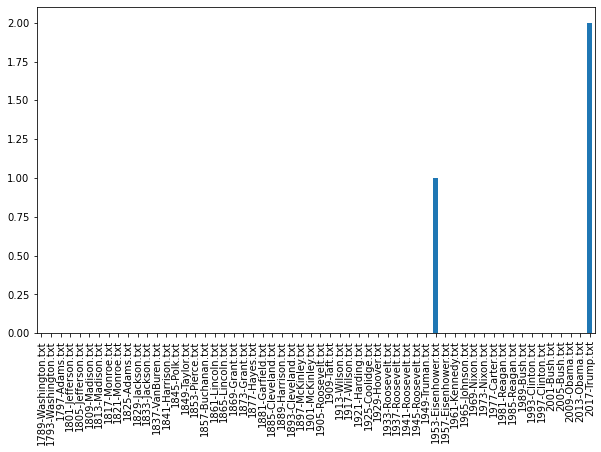

In [48]:
presidentsFreqs.T['winning'].plot(kind='bar', figsize=(10,6))

# Parts of Speech Tagging

- Noun: person, place, or thing, substance
- Verb: action: going, leaving, eating
- Adjective: descriptor: happy, sad, blue
- Adverb: -ly (but not always): happily, sadly, unfortunately, since
- Determiner: the, an
- Conjunction: and, or, but

[

In [53]:
sentence = "The quick brown fox jumped over the lazy dogs."
tokens = nltk.word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dogs', 'NNS'),
 ('.', '.')]

In [55]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [59]:
print(brown.words(categories=['adventure']))

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]


In [63]:
brown.categories()[0]

'adventure'

In [64]:
categoriesFreqs = {cat: nltk.FreqDist(brown.words(categories=cat)) for cat in brown.categories()}

In [69]:
categoriesDf = pd.DataFrame(categoriesFreqs).fillna(0.0)

In [73]:
lengths = pd.Series({cat: len(brown.words(categories=cat)) for cat in brown.categories()})

In [75]:
categoriesProps = categoriesDf / lengths

<AxesSubplot:>

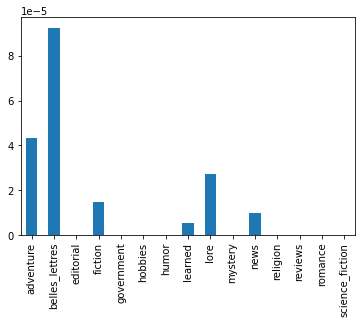

In [86]:
categoriesProps.loc['king'].plot(kind='bar')

In [89]:
posTags = {cat: nltk.pos_tag(brown.words(categories=cat)) for cat in brown.categories()}

In [91]:
def getPOSFreq(cat): 
    """ This gets nltk.FreqDist objects for POS tags for a brown corpus category. """
    tagPairs = nltk.pos_tag(brown.words(categories=cat)) # Returns a list of tuples (word, POStag)
    onlyTags = [pair[1] for pair in tagPairs]
    return nltk.FreqDist(onlyTags)

In [93]:
posStats = {cat: getPOSFreq(cat) for cat in brown.categories()}

In [96]:
posStatsProps =  pd.DataFrame(posStats) / lengths

<AxesSubplot:>

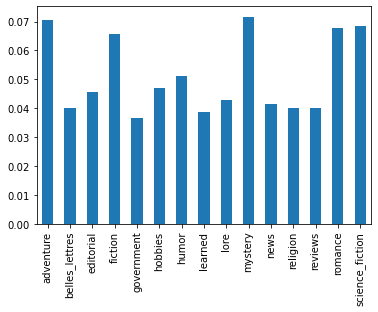

In [100]:
posStatsProps.loc['.'].plot(kind='bar')

In [101]:
adventureWords = brown.words(categories='adventure')

In [102]:
adventureWords

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

In [103]:
adventureTagged = nltk.pos_tag(adventureWords)

In [104]:
adventureTagged

[('Dan', 'NNP'),
 ('Morgan', 'NNP'),
 ('told', 'VBD'),
 ('himself', 'PRP'),
 ('he', 'PRP'),
 ('would', 'MD'),
 ('forget', 'VB'),
 ('Ann', 'NNP'),
 ('Turner', 'NNP'),
 ('.', '.'),
 ('He', 'PRP'),
 ('was', 'VBD'),
 ('well', 'RB'),
 ('rid', 'JJ'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('.', '.'),
 ('He', 'PRP'),
 ('certainly', 'RB'),
 ("didn't", 'VBZ'),
 ('want', 'VB'),
 ('a', 'DT'),
 ('wife', 'NN'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('fickle', 'VBN'),
 ('as', 'IN'),
 ('Ann', 'NNP'),
 ('.', '.'),
 ('If', 'IN'),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('married', 'VBN'),
 ('her', 'PRP'),
 (',', ','),
 ("he'd", 'NN'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('asking', 'VBG'),
 ('for', 'IN'),
 ('trouble', 'NN'),
 ('.', '.'),
 ('But', 'CC'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('rationalization', 'NN'),
 ('.', '.'),
 ('Sometimes', 'RB'),
 ('he', 'PRP'),
 ('woke', 'VBD'),
 ('up', 'RP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('middle', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('night',

In [110]:
# Find: VB Ann Turner
for i, posPair in enumerate(adventureTagged): 
    word, pos = posPair
    #print("Index is: " + str(i))
    #print("Word is: " + word) 
    #print("POS is: " + pos)
    if i+1 < len(adventureTagged): # Don't go beyond the end
        nextWord, nextPOS = adventureTagged[i+1]
    prevWord, prevPOS = adventureTagged[i-1]
    if word == 'Ann' and nextWord == 'Turner' and prevPOS == 'VB': 
        print(prevWord)

forget


In [112]:
list(enumerate(['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [115]:
help(nltk.FreqDist.elements)

Help on function elements in module collections:

elements(self)
    Iterator over elements repeating each as many times as its count.
    
    >>> c = Counter('ABCABC')
    >>> sorted(c.elements())
    ['A', 'A', 'B', 'B', 'C', 'C']
    
    # Knuth's example for prime factors of 1836:  2**2 * 3**3 * 17**1
    >>> prime_factors = Counter({2: 2, 3: 3, 17: 1})
    >>> product = 1
    >>> for factor in prime_factors.elements():     # loop over factors
    ...     product *= factor                       # and multiply them
    >>> product
    1836
    
    Note, if an element's count has been set to zero or is a negative
    number, elements() will ignore it.

